## 可视化线性关系¶
* 许多数据集包含多个定量变量，分析的目标通常是将这些变量相互关联

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

* regplot()和lmplot()绘制两个变量的散点图，x和y，然后拟合回归模型并绘制得到的回归直线和该回归一个95％置信区间：y ~ x

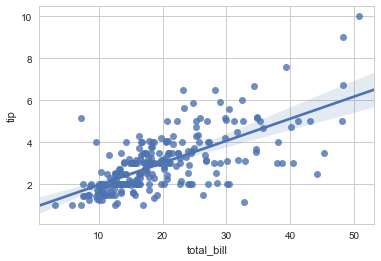

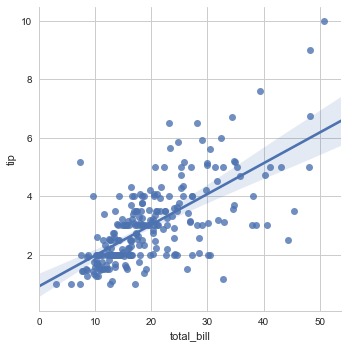

In [28]:
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that regplot() accepts `the x and y variables in a variety` of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be `specified as strings`. This data format is called `“long-form” or “tidy” data` Other than this input flexibility, regplot() possesses a subset of lmplot()‘s features, so we will demonstrate them using the latter.

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal

* 离散点的拟合

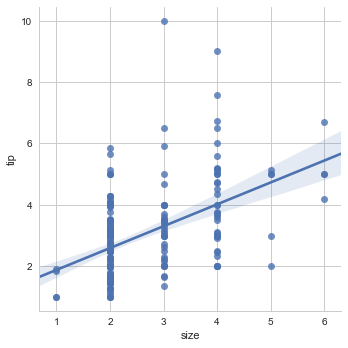

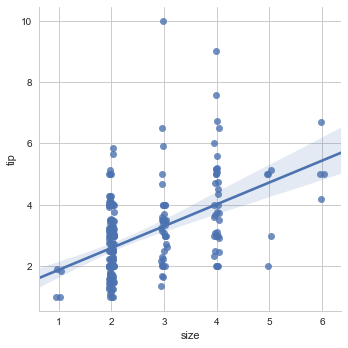

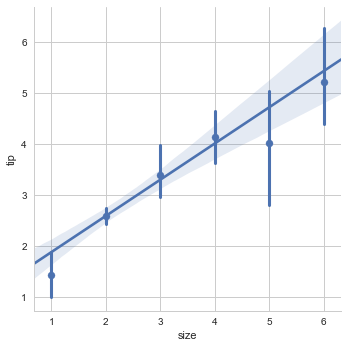

In [29]:
sns.lmplot(x="size", y="tip", data=tips)
plt.show()
# 同样可以加 噪声
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)
plt.show()
# 第二种选择是折叠每个离散值中的观察值以绘制中心趋势的估计值以及置信区间
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)
plt.show()

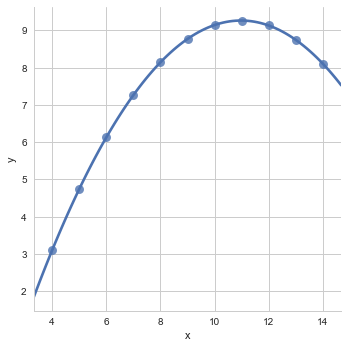

In [30]:
# 多项式拟合
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})
plt.show()

* 在存在异常值的情况下，拟合稳健的回归可能是有用的，该回归使用不同的损失函数来降低相对较大的残差

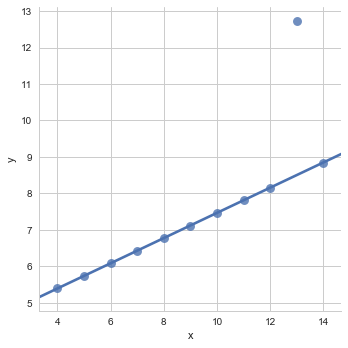

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80}) # 更稳健的拟合
plt.show()

* 子图的绘制 col

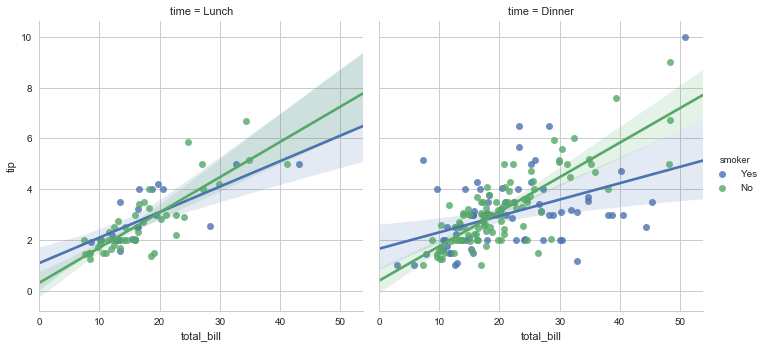

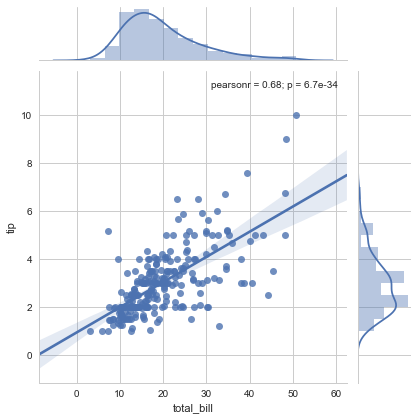

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")
plt.show()

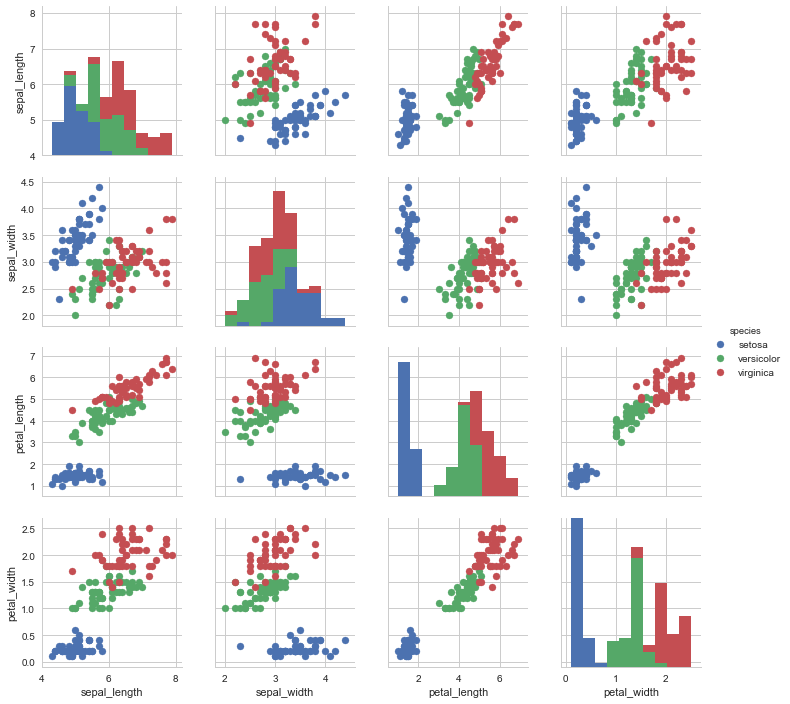

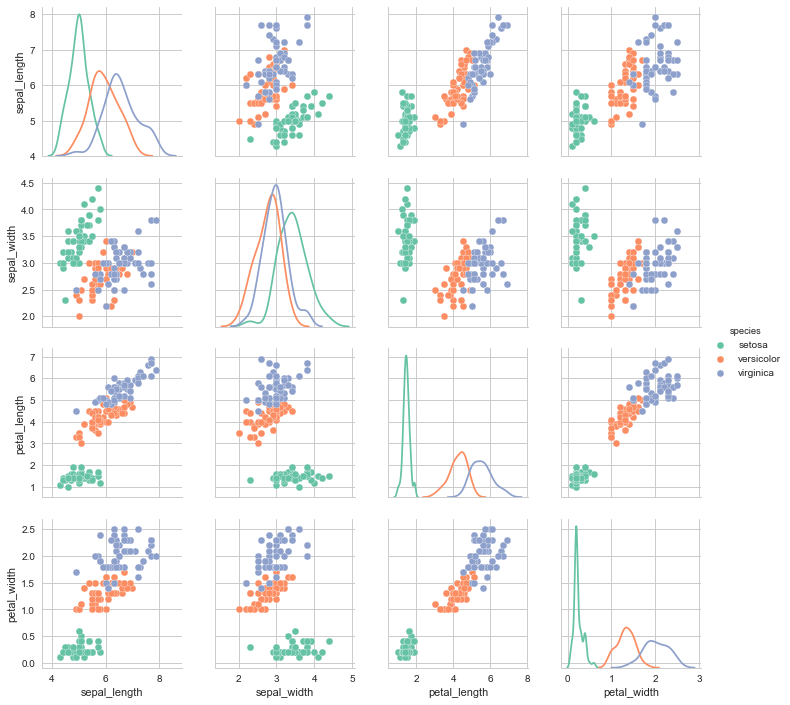

In [34]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist) # 对角线
g.map_offdiag(plt.scatter) # 非对角线
g.add_legend()
plt.show()
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)
plt.show()